#¿Qué son los Landmarks Faciales?

Imaginen que queremos "marcar" los puntos más importantes de un rostro. ¿Cuáles serían? Las esquinas de los ojos, la punta de la nariz, las comisuras de los labios, la forma de la mandíbula, etc.

Los Landmarks Faciales son precisamente eso: un conjunto de puntos específicos predefinidos que representan características clave de un rostro humano en una imagen. Piensen en ellos como un "mapa" detallado de la cara.

<img src="https://ai.google.dev/static/mediapipe/images/solutions/face_landmarker_keypoints.png?hl=es-419" alt="Puntos clave de detección facial" width="40%">

## ¿Para qué sirven?

Tener este "mapa" de puntos en un rostro es increíblemente útil en Visión por Computadora para muchísimas aplicaciones:

** Alineación de rostros: Normalizar la posición y orientación de las caras para que estén siempre mirando al frente y centradas, facilitando otras tareas como el reconocimiento facial.

** Análisis de expresiones: Detectar si alguien está sonriendo, sorprendido, enojado, basándose en la posición relativa de los puntos (especialmente alrededor de la boca y los ojos).

** Filtros y efectos (¡como los de Instagram o Snapchat!): Superponer objetos virtuales (anteojos, sombreros, máscaras) de forma precisa sobre el rostro.

** Realidad Aumentada: Anclar elementos virtuales al rostro en tiempo real.

** Animación: Mover personajes digitales basándose en los movimientos de un actor real.

** Medición de distancias: Calcular distancias entre puntos para análisis forenses o médicos.

En resumen, los landmarks faciales nos dan una forma estructurada de entender la geometría y la pose de un rostro en una imagen.

**¡Manos a la obra!** Encontrando Landmarks
Vamos a usar una biblioteca de Google llamada MediaPipe. MediaPipe es genial porque nos da "soluciones" listas para usar para tareas comunes de visión por computadora y aprendizaje automático, ¡como detectar landmarks faciales!

También usaremos OpenCV (cv2), que es la biblioteca estándar para manejar imágenes en Python.

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q
!pip install opencv-contrib-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

!pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian-security bullseye-security InRelease
Hit:3 http://deb.debian.org/debian bullseye-updates InRelease




libgl1-mesa-glx is already the newest version (20.3.5-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Instalamos mediapipe (generalmente ya está instalado en Colab)
# La exclamación al principio indica que es un comando de terminal
!pip install --upgrade numpy
!pip install mediapipe opencv-python

  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow 2.15.1 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.6 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.22.4; python_version < "3.11", but you have numpy 2.2.6 which is incompatible.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
deepnote-toolkit 0.1.0 requires numpy<2,>=1.19; python_version >= "3.8" and python_version < "4.0", but you have numpy 2.2.6 which is incompatible.
deepnote-toolkit 0.1.0 requires numpy<2

In [3]:
# Primero instalamos mediapipe ya que no está disponible
!pip install mediapipe

# Ahora importamos las bibliotecas necesarias
import cv2  # Para manejar imágenes (leer, mostrar, dibujar)
import mediapipe as mp  # La biblioteca que hace la magia de encontrar los puntos
# Esta es una función especial para mostrar imágenes en Google Colab

print("Bibliotecas importadas correctamente.")


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
2025-06-16 21:43:03.230207: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-16 21:43:03.236167: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-16 21:43:03.284706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-16 21:43:03.284860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-16 21:43:03.286220: 

In [4]:
# Necesitamos una imagen de un rostro para probar.
# Vamos a descargar una desde internet.
# Si queres, podes subir tu propia foto a Colab y cambiar el nombre del archivo.

# URL de una imagen de ejemplo con un rostro simple
image_url = "https://i.pinimg.com/736x/2d/30/9e/2d309e8695a57c7a7c51985b47b9ae2c.jpg"
# Nombre con el que guardaremos el archivo en Colab
image_path = "rostro_ejemplo.jpg"

print(f"Descargando imagen desde: {image_url}")
try:
    # Usamos una función simple para descargar el archivo
    import urllib.request
    urllib.request.urlretrieve(image_url, image_path)
    print(f"Imagen descargada como: {image_path}")
except Exception as e:
    print(f"¡Error al descargar la imagen! {e}")
    print("\nPor favor, sube una imagen de un rostro a la sesión de Colab manualmente.")
    print("Puedes hacerlo haciendo click en el ícono de la carpeta a la izquierda y arrastrando tu archivo.")
    print(f"Luego, asegúrate de que el archivo se llame '{image_path}' o cambia 'image_path' a tu nombre de archivo.")


Descargando imagen desde: https://i.pinimg.com/736x/2d/30/9e/2d309e8695a57c7a7c51985b47b9ae2c.jpg
Imagen descargada como: rostro_ejemplo.jpg


In [5]:
# Ahora vamos a cargar la imagen que descargamos (o subiste)
# OpenCV la lee y la guarda en una variable 'imagen'
imagen = cv2.imread(image_path)

# Verificamos si la imagen se cargó correctamente
if imagen is None:
    print(f"¡Error! No se pudo cargar la imagen desde {image_path}.")
    print("Asegúrate de que el archivo exista en el entorno de Colab y el nombre sea correcto.")
else:
    print("Imagen cargada correctamente.")
    # Mostramos las dimensiones de la imagen (ancho x alto)
    print(f"Dimensiones de la imagen: {imagen.shape[1]} píxeles de ancho x {imagen.shape[0]} píxeles de alto.")

    # MediaPipe funciona mejor con imágenes en formato RGB (Rojo, Verde, Azul)
    # Pero OpenCV las carga en BGR (Azul, Verde, Rojo).
    # Hacemos la conversión necesaria.
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    print("Imagen convertida a formato RGB para MediaPipe.")

Imagen cargada correctamente.
Dimensiones de la imagen: 736 píxeles de ancho x 1104 píxeles de alto.
Imagen convertida a formato RGB para MediaPipe.


In [6]:
# Aquí le decimos a MediaPipe que use su "solución" para encontrar puntos faciales.
# mp.solutions.face_mesh contiene el modelo pre-entrenado.
# FaceMesh es la clase que usamos para crear el detector.
# static_image_mode=True: Le decimos que procese una imagen estática (no un video).
# max_num_faces=1: Le decimos que solo busque un rostro para simplificar.
# refine_landmarks=True: Intenta hacer los puntos un poco más precisos.
# min_detection_confidence=0.5: Solo considera un rostro si está seguro al menos en un 50%.
mp_face_mesh = mp.solutions.face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5)

print("Detector de puntos faciales inicializado.")

# Ahora procesamos la imagen. MediaPipe busca rostros y, si encuentra, sus puntos.
print("Procesando la imagen para encontrar puntos...")
resultados = mp_face_mesh.process(imagen_rgb)

# Una vez que terminamos de usar el detector, lo liberamos
mp_face_mesh.close()

print("Procesamiento completado.")

Detector de puntos faciales inicializado.
Procesando la imagen para encontrar puntos...
Procesamiento completado.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1750110187.933368    1931 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750110187.965957    1930 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750110187.975853    1934 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


¡Rostro(s) detectado(s)! Se encontraron puntos faciales.
Cantidad de puntos detectados en el rostro: 478
Puntos dibujados sobre la imagen.


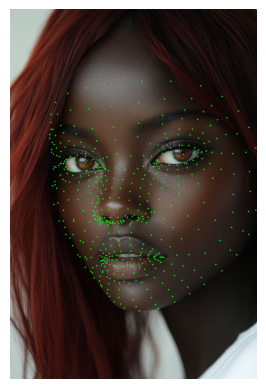

In [7]:
# Creamos una copia de la imagen original para dibujar sobre ella
# Así no modificamos la imagen original
imagen_con_puntos = imagen.copy()

# Obtenemos las dimensiones de la imagen (alto y ancho)
alto, ancho, _ = imagen.shape

# Verificamos si MediaPipe encontró algún rostro y sus puntos
# 'resultados.multi_face_landmarks' es una lista de los rostros encontrados
if resultados.multi_face_landmarks:
    print(f"¡Rostro(s) detectado(s)! Se encontraron puntos faciales.")

    # Tomamos el primer rostro detectado (porque pusimos max_num_faces=1)
    rostro = resultados.multi_face_landmarks[0]

    # Mostramos cuántos puntos se encontraron en este rostro
    print(f"Cantidad de puntos detectados en el rostro: {len(rostro.landmark)}")

    # Ahora, recorremos cada punto (landmark) detectado en este rostro
    # 'rostro.landmark' es la lista de todos los puntos
    for id_punto, punto in enumerate(rostro.landmark):
        # 'punto' tiene las coordenadas x, y, z (la z es la profundidad, no la usaremos ahora)
        # Las coordenadas x e y están normalizadas (entre 0 y 1)

        # Convertimos las coordenadas normalizadas a coordenadas de píxeles reales
        # Multiplicamos por el ancho o alto de la imagen
        coord_x_pixel = int(punto.x * ancho)
        coord_y_pixel = int(punto.y * alto)

        # Dibujamos un pequeño círculo en la posición del punto sobre la imagen_con_puntos
        # cv2.circle(imagen, centro, radio, color, grosor)
        # centro: es una tupla (x, y)
        # radio: el tamaño del círculo (1 o 2 píxeles es suficiente)
        # color: una tupla (B, G, R) - usamos (0, 255, 0) que es Verde en OpenCV
        # grosor: -1 significa que rellene el círculo
        cv2.circle(imagen_con_puntos, (coord_x_pixel, coord_y_pixel), 2, (0, 255, 0), -1) # Dibujamos un punto verde de radio 2

    print("Puntos dibujados sobre la imagen.")

    # Finalmente, mostramos la imagen resultante con los puntos dibujados
    #print("\n--- Imagen con Puntos Faciales ---")
    # Usamos matplotlib para mostrar la imagen en lugar de cv2_imshow
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(imagen_con_puntos, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

else:
    print("No se detectaron rostros en la imagen. Intenta con otra imagen o ajusta la confianza de detección.")

##Conclusión

Acabamos de usar herramientas poderosas para detectar y visualizar los puntos clave de un rostro humano. Vimos qué son los landmarks faciales, para qué sirven y cómo podemos encontrarlos con pocas líneas de código gracias a bibliotecas como MediaPipe y OpenCV.

Este es solo el comienzo. A partir de estos puntos, se pueden hacer análisis más complejos, como medir la distancia entre los ojos, determinar el ángulo de la cabeza, o incluso empezar a reconocer expresiones.

## Referencia

[Guía de detección de puntos de referencia faciales](https://ai.google.dev/edge/mediapipe/solutions/vision/face_landmarker?hl=es-419)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>